In [6]:
# Dependencies
import numpy as np
import pandas as pd
import datetime as dt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement.tobs).filter(extract('month', Measurement.date) ==6).all()

In [55]:
#  3. Convert the June temperatures to a list.

#Unnecessary, right?

[('2010-06-01', 78.0),
 ('2010-06-02', 76.0),
 ('2010-06-03', 78.0),
 ('2010-06-04', 76.0),
 ('2010-06-05', 77.0),
 ('2010-06-06', 78.0),
 ('2010-06-07', 77.0),
 ('2010-06-08', 78.0),
 ('2010-06-09', 78.0),
 ('2010-06-10', 79.0),
 ('2010-06-11', 78.0),
 ('2010-06-12', 78.0),
 ('2010-06-13', 78.0),
 ('2010-06-14', 77.0),
 ('2010-06-15', 78.0),
 ('2010-06-16', 78.0),
 ('2010-06-17', 77.0),
 ('2010-06-18', 77.0),
 ('2010-06-19', 82.0),
 ('2010-06-20', 78.0),
 ('2010-06-21', 78.0),
 ('2010-06-22', 78.0),
 ('2010-06-23', 78.0),
 ('2010-06-24', 78.0),
 ('2010-06-25', 77.0),
 ('2010-06-26', 76.0),
 ('2010-06-27', 78.0),
 ('2010-06-28', 78.0),
 ('2010-06-29', 78.0),
 ('2010-06-30', 78.0),
 ('2011-06-01', 77.0),
 ('2011-06-02', 78.0),
 ('2011-06-03', 73.0),
 ('2011-06-04', 70.0),
 ('2011-06-05', 76.0),
 ('2011-06-06', 77.0),
 ('2011-06-07', 77.0),
 ('2011-06-08', 77.0),
 ('2011-06-09', 77.0),
 ('2011-06-10', 78.0),
 ('2011-06-11', 77.0),
 ('2011-06-12', 77.0),
 ('2011-06-13', 78.0),
 ('2011-06-

In [7]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_temps_df = pd.DataFrame(june_temps, columns=['June Temps'])
june_temps_df.head()

,June Temps
0,78.0
1,76.0
2,78.0
3,76.0
4,77.0


In [8]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_temps_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [9]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement.tobs).filter(extract('month', Measurement.date) == 12).all()

In [9]:
# 7. Convert the December temperatures to a list.


In [10]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_temps_df = pd.DataFrame(dec_temps, columns=['December Temps'])

In [65]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_temps_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


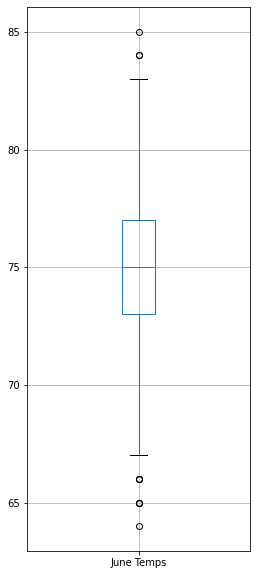

In [11]:
#Getting some figures for the report

import matplotlib.pyplot as plt
compare = june_temps_df.boxplot(column='June Temps', figsize=(4,10))
plt.savefig("Fig1.png", dpi = 300)

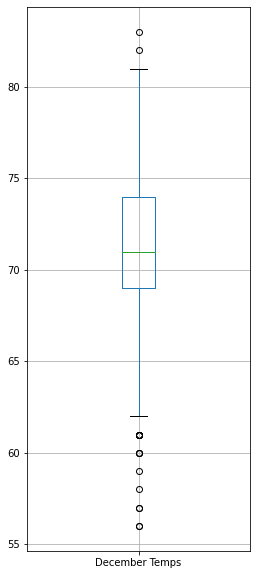

In [12]:
dec_temps_df.boxplot(column='December Temps', figsize=(4,10))
plt.savefig('Fig2.png', dpi=300)

In [19]:
#Additional Queries
# 2 queries: max, min, avg for each month by year
# results_june = []
# for x in range(7):
#     year = 2010 + x
#     june_st = dt.date(year + x, 6, 1)
#     june_end = dt.date(year + x, 6, 30)
#     results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
#     filter((Measurement.date >= june_st) and (Measurement.date <= june_end).all()
#     results_june.append(results)

In [14]:
results_june = {}
for x in range(8):
    year = 2010 + x
    june_st = dt.date(year, 6, 1)
    june_end = dt.date(year, 6, 30)
    results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.date >= june_st).filter(Measurement.date <= june_end).all()
    results_june[year] = results
    print(f'Done with {year}')

Done with 2010
Done with 2011
Done with 2012
Done with 2013
Done with 2014
Done with 2015
Done with 2016
Done with 2017


In [15]:
results_june_df = pd.DataFrame.from_dict(results_june, orient='index', columns=['MinMaxAvg'])
results_june_df['Min'], results_june_df['Max'], results_june_df['Avg'] = results_june_df.MinMaxAvg.str

<ipython-input-15-09d7eb6e616a>:2: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  results_june_df['Min'], results_june_df['Max'], results_june_df['Avg'] = results_june_df.MinMaxAvg.str


In [16]:
results_june_df = results_june_df.drop(columns='MinMaxAvg')

In [17]:
results_june_df

,Min,Max,Avg
2010,67.0,85.0,74.925620
2011,65.0,82.0,73.938326
2012,68.0,81.0,74.000000
2013,66.0,81.0,74.599078
2014,67.0,84.0,75.027907
2015,66.0,81.0,74.990148
2016,64.0,81.0,75.175258
2017,71.0,83.0,77.219895


In [18]:
#compiling query for decemeber breakdown
results_dec = {}
for x in range(8):
    year = 2010 + x
    dec_st = dt.date(year, 12, 1)
    dec_end = dt.date(year, 12, 31)
    results = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.date >= dec_st).filter(Measurement.date <= dec_end).all()
    results_dec[year] = results
    #print(f'Done with {year}')
    
# converting to dataframe and tidying
results_dec_df = pd.DataFrame.from_dict(results_dec, orient='index', columns=['MinMaxAvg'])
results_dec_df['Min'], results_dec_df['Max'], results_dec_df['Avg'] = results_dec_df.MinMaxAvg.str
results_dec_df = results_dec_df.drop(columns='MinMaxAvg')
results_dec_df

<ipython-input-18-6361b323be4a>:14: FutureWarning: Columnar iteration over characters will be deprecated in future releases.
  results_dec_df['Min'], results_dec_df['Max'], results_dec_df['Avg'] = results_dec_df.MinMaxAvg.str


,Min,Max,Avg
2010,58.0,80.0,70.208511
2011,63.0,77.0,70.820628
2012,61.0,80.0,71.188073
2013,63.0,83.0,71.094017
2014,56.0,81.0,69.896861
2015,65.0,82.0,73.423913
2016,60.0,78.0,71.130000
2017,NaN,NaN,NaN
